In [1]:
import numpy as np
from csc.utils import *
from csc.atoms import *
from csc.dictionary import *
from csc.workbench import *
from itertools import product
import matplotlib.pyplot as plt

# Atom parameters
bmin = 0.005
bmax = 0.06
b_step = 0.005
b_values = np.arange(bmin, bmax, b_step)

ymin = 0.010
ymax = 0.036
y_step = 0.002
y_values = np.arange(ymin, ymax, y_step)

s_values = [1]

dictionary = ZSDictionary.from_values(b_values, y_values, s_values)
print('The dictionary has {} different atoms'.format(len(dictionary)))

The dictionary has 143 different atoms


### Workbench initialization with a database path

In [2]:
batchSize = 200

pomme = False

if pomme :
    input_signals_db = f'/home/gomes/synthetic-data/constrained-signals-{batchSize}.json'

    icassp_mmp_db = f'/home/gomes/synthetic-data/icassp-mmpdf10-{batchSize}.json'
    icassp_mp_db = f'/home/gomes/synthetic-data/icassp-mp-{batchSize}.json'
    icassp_omp_db = f'/home/gomes/synthetic-data/icassp-omp-{batchSize}.json'
    
else:
    constrained_signals_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\constrained-signals-{batchSize}.json'
    no_constrained_signals_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\synthetic-signals-{batchSize}.json'
    
    icassp_mmp27_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\synthetic-data\\icassp-mmpdf27-{batchSize}.json'
    icassp_mmp9_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\synthetic-data\\icassp-mmpdf9-{batchSize}.json'
    icassp_mmp3_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\synthetic-data\\icassp-mmpdf3-{batchSize}.json'
    
    icassp_mp_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\synthetic-data\\icassp-mp-{batchSize}.json'
    icassp_omp_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\synthetic-data\\icassp-omp-{batchSize}.json'
    icassp_alphaCSC_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\synthetic-data\\icassp-alphaCSC-{batchSize}.json'

    no_constraint_mmp_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\synthetic-data\\240724-mmpdf10-{batchSize}.json'
    no_constraint_mp_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\synthetic-data\\240724-mp-{batchSize}.json'
    no_constraint_omp_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\synthetic-data\\240724-omp-{batchSize}.json'
    

In [3]:
constrained_workbench = CSCWorkbench(constrained_signals_db)
constrained_workbench.load_data()
constrained_workbench.set_dictionary(dictionary)

Processing OMP: 100%|██████████| 3200/3200 [01:01<00:00, 52.31it/s] 


       algo_type    id  snr  overlap  local_mse      delay
4     conv-MMP27   400    0        4   0.001304  16.747691
12    conv-MMP27   401    0        4   0.000900  12.219859
21    conv-MMP27   402    0        4   0.000763  15.841710
23    conv-MMP27   402    0        4   0.000598  15.841710
34    conv-MMP27   403    0        4   0.000717  15.110811
...          ...   ...  ...      ...        ...        ...
8696    conv-OMP  2996   15        4   0.000683   3.022105
8705    conv-OMP  2997   15        4   0.000305   2.730382
8707    conv-OMP  2997   15        4   0.000043   2.730382
8718    conv-OMP  2998   15        4   0.000160   2.458858
8727    conv-OMP  2999   15        4   0.000305   3.370883

[4904 rows x 6 columns]
    algo_type      delay
0  conv-MMP27  54.623587
1   conv-MMP3  15.728194
2   conv-MMP9  33.977547
3    conv-OMP   5.169465


<Figure size 1200x800 with 0 Axes>

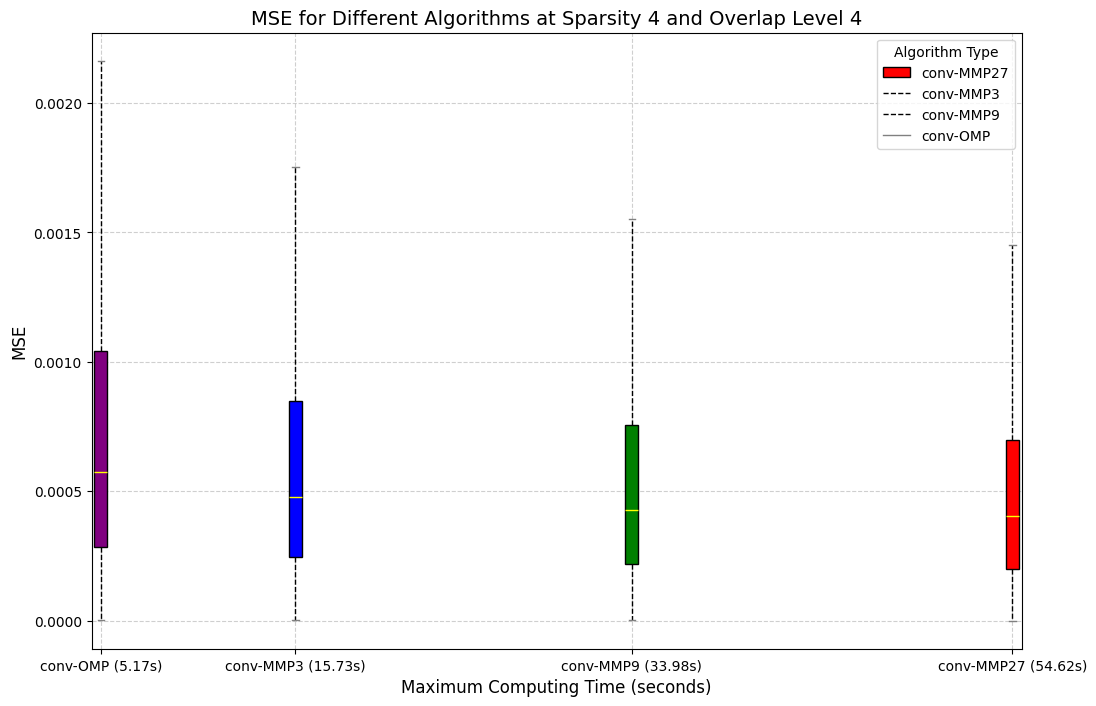

In [4]:
constrained_workbench.boxplotDelayVsMSE(
    sparsity=4,
    overlap_level=4,
    MMP27=icassp_mmp27_db,
    MMP9=icassp_mmp9_db,
    MMP3=icassp_mmp3_db,
    OMP=icassp_omp_db,
    verbose=True
)

Processing OMP: 100%|██████████| 3200/3200 [02:22<00:00, 22.53it/s] 


        algo_type    id  snr  overlap  local_mse      delay
9      conv-MMP27   600    0        5   0.000723  28.739895
31     conv-MMP27   602    0        5   0.000881   2.350331
33     conv-MMP27   602    0        5   0.001137   2.350331
35     conv-MMP27   602    0        5   0.001150   2.350331
46     conv-MMP27   603    0        5   0.000316  24.870977
...           ...   ...  ...      ...        ...        ...
10685    conv-OMP  3198   15        5   0.000454   4.888675
10687    conv-OMP  3198   15        5   0.000154   4.888675
10689    conv-OMP  3198   15        5   0.000362   4.888675
10691    conv-OMP  3198   15        5   0.000174   4.888675
10702    conv-OMP  3199   15        5   0.000496   4.565576

[4956 rows x 6 columns]
    algo_type      delay
0  conv-MMP27  84.634404
1   conv-MMP3  16.764978
2   conv-MMP9  45.409589
3    conv-OMP   7.826494


<Figure size 1200x800 with 0 Axes>

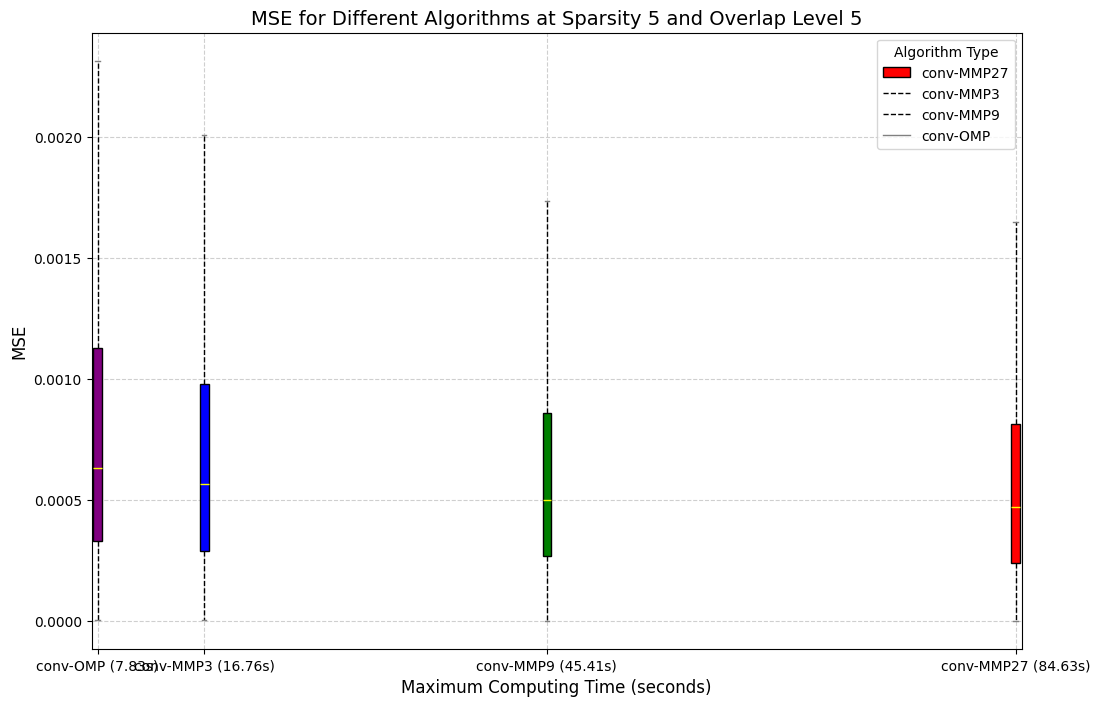

In [5]:
constrained_workbench.boxplotDelayVsMSE(
    sparsity=5,
    overlap_level=5,
    MMP27=icassp_mmp27_db,
    MMP9=icassp_mmp9_db,
    MMP3=icassp_mmp3_db,
    OMP=icassp_omp_db,
    verbose=True
)